# 17136번 색종이 붙이기 - Gold 2

#### 알고리즘 분류: 백트래킹 , 브루트포스


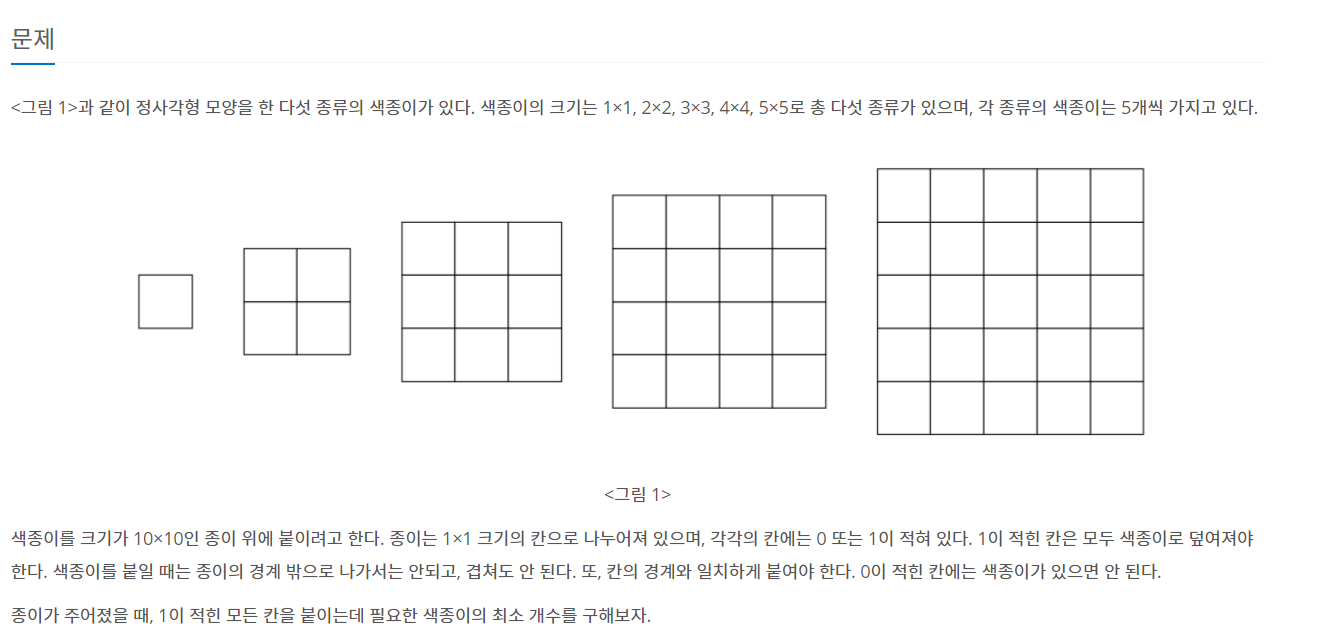


In [ ]:
board = [list(map(int,input().split())) for _ in range(10)]

from copy import deepcopy
nums_one = 0
for i in range(10):
    for j in range(10):
        if board[i][j]:
            nums_one += 1

answer =float('inf')
paper= [0,5,5,5,5,5]

visited = [[0]* 10 for _ in range(10)]

def check(y,x,size):
    if size+y > 10 or x+size > 10:
        return False

    for i in range(size):
        for j in range(size):
            if board[y+i][x+j] == 0  or visited[y+i][x+j] == 1:
                return False
    return True

def solve(cnt,nums_one):
    global answer

    if nums_one == 0:
        answer = min(answer,cnt)
        return
    if cnt> answer:
        return
    if nums_one and sum(paper) == 0 :
        return

    for i in range(10):
        for j in range(10):
            if board[i][j] and visited[i][j] == 0:
                for size in range(5, 0, -1):
                    if size ** 2 > nums_one or not paper[size]:
                        continue

                    flag = check(i,j,size)

                    if flag:
                        for k in range(size):
                            for l in range(size):
                                visited[i+k][j+l] = 1
                        paper[size] -= 1


                        solve(cnt+1,nums_one - size **2 )

                        for k in range(size):
                            for l in range(size):
                                visited[i+k][j+l] = 0
                        paper[size] += 1
                return

solve(0,nums_one)
if answer == float('inf'):
    print(-1)
else:
    print(answer)
